<a href="https://colab.research.google.com/github/sauravrox/sentiment-analysis/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import tkinter as tk
import tweepy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
!pip install emoji
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import pickle
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib
# print(sklearn.__version__)
matplotlib.use('Agg')
nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 133kB 7.1MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

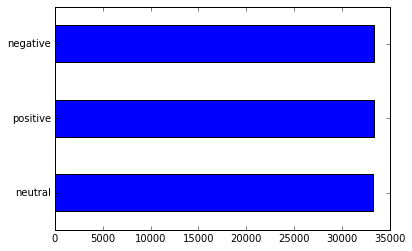

In [3]:
# Local directory
%matplotlib inline

Reviewdata = pd.read_csv('/content/drive/MyDrive/thesis/train.csv', encoding='latin-1')
Reviewdata = Reviewdata.dropna()
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])
Reviewdata['sentiment'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

In [4]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.selected_text.apply(cleaned))
Reviewdata.head(10)

,selected_text,sentiment,cleaned_description
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,switchfoot Awww thats a bummer You shoulda ...
1,is upset that he can't update his Facebook by ...,negative,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,negative,Kenichan I dived many times for the ball Manag...
3,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",negative,nationwideclass no its not behaving at all im ...
5,@Kwesidei not the whole crew,negative,Kwesidei not the whole crew
6,Need a hug,negative,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,LOLTrish hey long time no see Yes Rains a bit...
8,@Tatiana_K nope they didn't have it,negative,TatianaK nope they didnt have it
9,@twittera que me muera ?,negative,twittera que me muera


In [5]:
def extract_emojis(s):
	tweet = emoji.demojize(s)
	tweet = tweet.replace(":"," ")
	tweet = ' '.join(tweet.split())
	return tweet

# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned))
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])

In [7]:
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.25, random_state = 225)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()

clf2 = LogisticRegression(solver = "liblinear")

from sklearn.pipeline import Pipeline

IV_train, IV_test, DV_train, DV_test = model_selection.train_test_split(Independent_var, Dependent_var, test_size=0.25, random_state=109)

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

In [9]:
model.fit(IV_train, DV_train)
predictions = model.predict(IV_test)
print("Logistic Confusion Matrix: ", confusion_matrix(predictions, DV_test)) 

Logistic Confusion Matrix:  [[6078 1752 1452]
 [ 751 4845  881]
 [1505 1709 6015]]


In [10]:
print ("Logistic Accuracy : ", 
accuracy_score(predictions,DV_test)*100) 

Logistic Accuracy :  67.78453657755723


In [11]:
print("Logistic Report : ", 
classification_report(predictions, DV_test)) 

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, Independent_var, Dependent_var, cv=kfold, scoring=scoring)

Logistic Report :                precision    recall  f1-score   support

           0       0.73      0.65      0.69      9282
           1       0.58      0.75      0.66      6477
           2       0.72      0.65      0.68      9229

    accuracy                           0.68     24988
   macro avg       0.68      0.68      0.68     24988
weighted avg       0.69      0.68      0.68     24988



In [12]:
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.678 (0.003)


In [13]:
consumerKey = 'Y76b838VJixCT9coY5aVaFWRv'
consumerSecret = 'MWQiIs4rzY8zKySusGf6hPiLU8e3vAbJNV02lKi3FLhdfirUmT'
accessToken = '1266387212150566913-HS7RCIKe86EsZFmMVMjeOF3SWlvCY5'
accessTokenSecret = 'AnngLumAWhaKXw1avMXR8eWu1GUllVMrML1zQKy1poLBP'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

user_data = '%23'+'biden'

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")
posts = list()
for tweet in tweepy.Cursor(api.search, q=user_data, lang='en').items(500):
	posts.append(tweet.text)

In [14]:
lemmatiser = WordNetLemmatizer()
list_posts = list()
for p in posts:
	temp = re.sub(' +', ' ', p).lower()
	temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
	temp = extract_emojis(temp)
	temp = text_clean(temp)
	list_posts.append(temp)
# print(list_posts)
df = pd.DataFrame([list_post for list_post in list_posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(text_clean)


In [15]:
# Create a function to get the polarity
def getPolarity(text):
	example = [text]
	result = model.predict(example)
	if result==1:
		result = 'neutral'
	if result==2:
		result = 'positive'
	if result==0:
		result = 'negative'
	return result

# # Create two new columns 'Subjectivity' & 'Polarity'
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [16]:
print(df)

                                                Tweets  Polarity
0    https tcomillairaui janetyellen eu  europeanco...  positive
1    rt shobhnayadava kamalaharris spoke narendramo...  positive
2    notice facewithrollingeyes facewithrollingeyes...   neutral
3    political influence federal reserve  pres bide...  negative
4    rt frontlineindia several democratic leader ur...   neutral
..                                                 ...       ...
495  rt gordongchang prez biden responsible colonia...  negative
496  implication bidens arbitrary return middle eas...  negative
497  cyber attack due potus joebiden weak inept nat...  negative
498  rt afbranco branco cartoon  whitewash https tc...  positive
499  rt gordongchang prez biden responsible colonia...  negative

[500 rows x 2 columns]


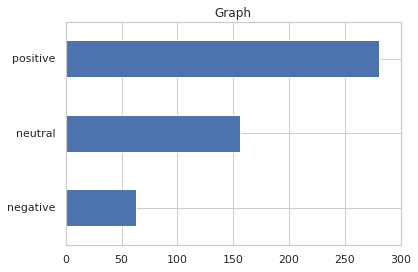

In [17]:
# use to set style of background of plot
sns.set(style="whitegrid")
 
# loading data-set
lr_data = df
keys=['Count','Percentage']
df['Polarity'].value_counts().sort_values().plot(kind = 'barh')
# sns.stripplot(x=df['Tweets'], y=df['Polarity'], data=iris,jitter=True)

plt.title('Graph')
 
# function to show plot
plt.show()

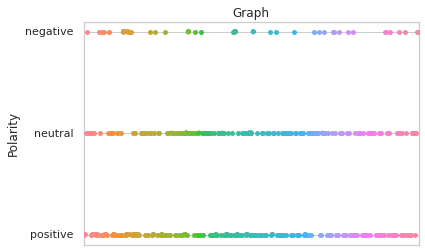

In [18]:
sn = sns.stripplot(x='Tweets', y=df['Polarity'], data=lr_data,jitter=True)
sn.set(xticklabels=[])
sn.set(xlabel=None)

plt.title('Graph')
 
# function to show plot
plt.show(sns)

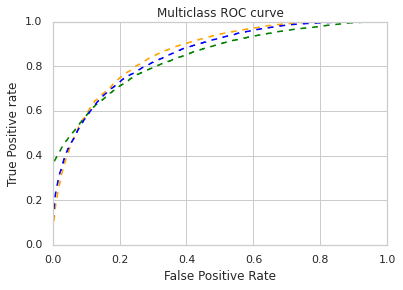

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob_pred = model.predict_proba(IV_test)

#roc auc score
roc_auc_score(DV_test, y_prob_pred, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(DV_test, y_prob_pred[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
# plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);
